In [26]:
# 데이터 중심의 지표
import pandas as pd
import numpy as np

In [27]:
file=pd.read_csv('ch2_scores_em.csv')
df = pd.DataFrame(file)

In [28]:
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


In [29]:
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [30]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [31]:
scores_df= pd.DataFrame({'score':scores},
                        index=pd.Index(['A', 'B','C','D','E','F','G','H','I','J'],
                                       name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [32]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [33]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [34]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [35]:
# 분산과 표준편차
scores_df.var()


score    95.555556
dtype: float64

In [36]:
# 분산
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [37]:
# 표준편차
np.sqrt(np.var(scores, ddof=0))
np.std(scores, ddof=0)

9.273618495495704

In [38]:
# 범위와 사분위 범위
# 범위
np.max(scores) - np.min(scores)
pd.Series(scores).describe()

#사분위 범위
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [39]:
# 데이터 정규화
# 데이터에서 평균을 빼고 표준편차로 나누는 작업
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [40]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [41]:
# 편찻값
# 평균이 50, 표준편차가 10이 되도록 정규화한 값
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [42]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [43]:
# 데이터 시각화
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [44]:
# 도수분포표
# 데이터의 분포 상태를 세부적으로 알고 싶을 때, 데이터가 취하는 값을 몇개의 구간으로 나누고
# 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [45]:
freq = np.histogram(english_scores, bins=10, range=(0,100))
freq

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [46]:
values = 1, 2, 3, 4, 5
a, b, *_ = values

In [47]:
a, b

(1, 2)

In [49]:
# np.histogram 함수 호출 부분에서 bins=10과 range=(0, 100)이 정확히 지정되었는지 확인
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))

# freq_class와 freq의 길이가 일치하는지 확인
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# DataFrame 생성
freq_dist_df = pd.DataFrame({'frequency': freq}, 
                            index=pd.Index(freq_class, name='class'))

print(freq_dist_df)

        frequency
class            
0~10            0
10~20           0
20~30           0
30~40           2
40~50           8
50~60          16
60~70          18
70~80           6
80~90           0
90~100          0


In [51]:
# 계급값 : 각 계급을 대표하는 값으로, 계급의 중앙값을 이용
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [52]:
# 상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [53]:
# 도수분포표
# 누적상대도수
# 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [55]:
# 계급값, 상대도수, 누적상대도수를 도수분포표에 추가
# 올바르게 변수를 추가하는지 확인
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq  # 앞에 잘못된 공백 제거
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

# 컬럼의 순서를 변경합니다.
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

# DataFrame 출력
print(freq_dist_df)

        class value  frequency  relative frequency  \
class                                                
0~10              5          0                0.00   
10~20            15          0                0.00   
20~30            25          0                0.00   
30~40            35          2                0.04   
40~50            45          8                0.16   
50~60            55         16                0.32   
60~70            65         18                0.36   
70~80            75          6                0.12   
80~90            85          0                0.00   
90~100           95          0                0.00   

        cumulative relative frequency  
class                                  
0~10                             0.00  
10~20                            0.00  
20~30                            0.00  
30~40                            0.04  
40~50                            0.20  
50~60                            0.52  
60~70                          

In [57]:
# 최빈값
# 최대 빈도를 가지는 행의 인덱스 찾기
max_index = freq_dist_df['frequency'].idxmax()

# 해당 인덱스에서 'class value' 추출하기
mode_class_value = freq_dist_df.loc[max_index, 'class value']

print(mode_class_value)

65


In [58]:
import matplotlib.pyplot as plt


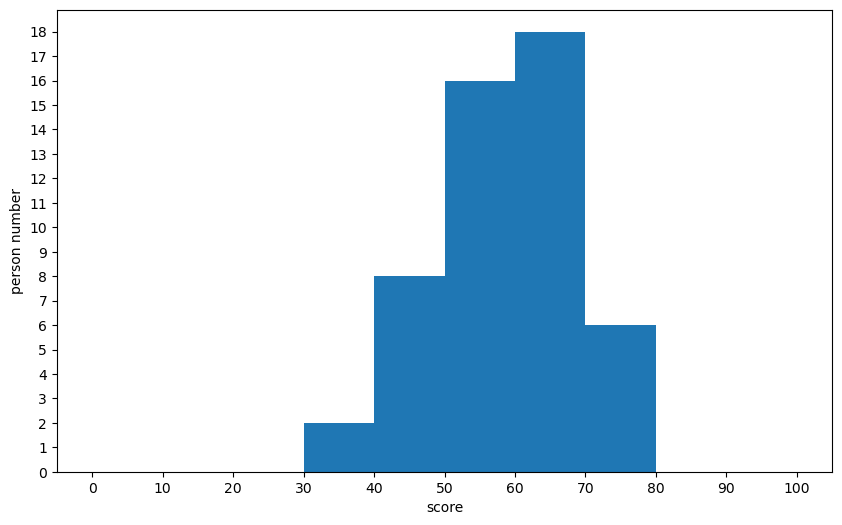

In [59]:
# 히스토그램
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

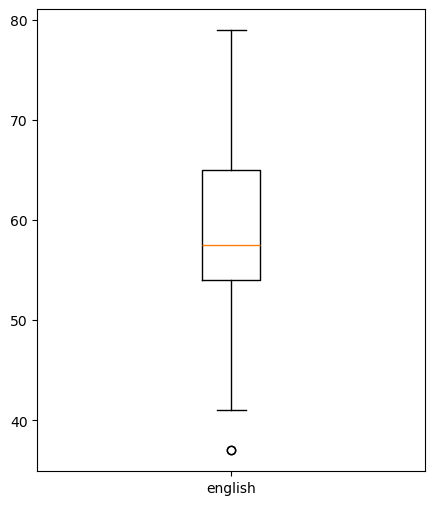

In [60]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()

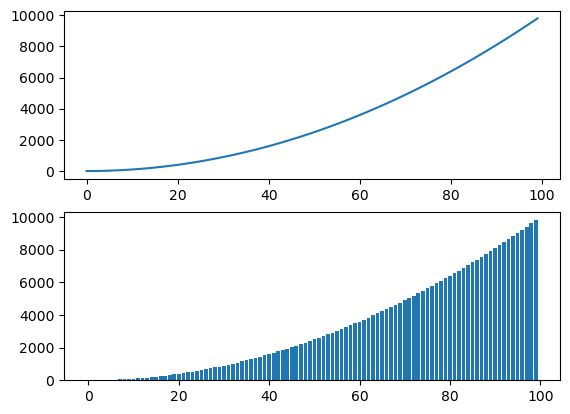

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = range(0, 100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x, y)

plt.show()